In [1]:
# !ls -lha kaggle.json 
# !pip install -q kaggle
# !mkdir -p ~/.kaggle 
# !cp kaggle.json ~/.kaggle/
# !pwd
# !chmod 600 ~/.kaggle/kaggle.json
# !mkdir datasets
# !cd datasets
# !kaggle datasets download -d fedesoriano/stroke-prediction-dataset
# !ls
# !unzip *.zip
# !rm *.zip

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#@title Removing missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text major ticklabel objects>)

<Figure size 640x480 with 0 Axes>

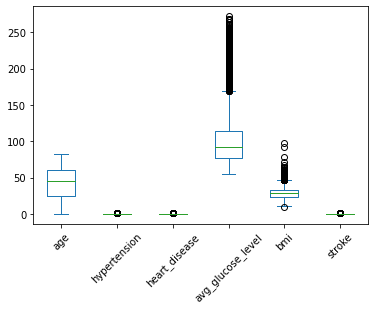

In [9]:
#@title outliers
plt.figure(figsize=(8, 6), dpi=80)
df.drop('id', axis=1).plot(kind='box')
plt.xticks(rotation = 45)

In [10]:
df[['avg_glucose_level']].describe().T

,count,mean,std,min,25%,50%,75%,max
avg_glucose_level,5110.0,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74


In [11]:
X = df.drop(['stroke', 'id'],axis=1)
y = df['stroke']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = make_column_transformer(
    [OneHotEncoder(drop='first'), df.select_dtypes('object').columns],
    [StandardScaler(), ['age', 'avg_glucose_level', 'bmi']]
)

In [14]:
pd.DataFrame(preprocessor.fit_transform(X_train), columns=[name.split('__')[-1] for name in preprocessor.get_feature_names_out()]).head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,avg_glucose_level,bmi
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.549705,-0.159561,-1.302855
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.062932,-0.586659,1.021503
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176126,-0.423123,0.008654
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707151,-0.663006,0.007776
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.841672,-0.239005,-0.783445


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier


models = {
    "log_reg" : {
        "model": LogisticRegression(solver='saga'),
        "param_grid": {"C": [0.1, 1, 10, 100], "penalty": ["l1", "l2"]},
    },
    "svc" : {
        "model": SVC(),
        "param_grid": {"C": [0.1, 1, 10, 100], "kernel": ["linear", "rbf"]},
    },
    "linear_svc" : {
        "model": LinearSVC(),
        "param_grid": {"C": [0.1, 1, 10, 100], "loss": ["hinge", "squared_hinge"]},
    },
    "knn" : {
        "model": KNeighborsClassifier(),
        "param_grid": {
            "n_neighbors": [1, 5, 10, 20],
            "weights": ["uniform", "distance"],
        },
    },
    "decision_tree" : {
        "model": DecisionTreeClassifier(),
        "param_grid": {
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 5, 10, 20],
        },
    },
    "random_forest" : {
        "model": RandomForestClassifier(),
        "param_grid": {
            "n_estimators": [10, 50, 100, 200],
            "criterion": ["gini", "entropy"],
            "max_depth": [None, 5, 10, 20],
        },
    },
    "mlp" : {
        "model": MLPClassifier(),
        "param_grid": {
            "hidden_layer_sizes": [(10,), (50,), (100,)],
            "alpha": [0.001, 0.01, 0.1],
            "activation": ["logistic", "relu"],
        },
    },
}

In [16]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


def find_best_model(X_train, y_train, models):

  scores = []

  for model_name, model_params in models.items():
    
    # pipe = make_pipeline(preprocessor, model_params['model'])
    gridcv = HalvingGridSearchCV(model_params['model'], model_params['param_grid'], verbose=2)
    gridcv.fit(preprocessor.fit_transform(X_train), y_train)
    scores.append({
        'model' : model_name,
        'best_params' : gridcv.best_params_,
        'score' : gridcv.best_score_
    })
    print(model_name)
  return pd.DataFrame(scores)

In [17]:
scores_df = find_best_model(X_train, y_train, models)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 1277
max_resources_: 3832
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 1277
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.1s
[CV] END .

In [19]:
scores_df

,model,best_params,score
0,log_reg,"{'C': 10, 'penalty': 'l2'}",0.954011
1,svc,"{'C': 1, 'kernel': 'rbf'}",0.954273
2,linear_svc,"{'C': 10, 'loss': 'hinge'}",0.954011
3,knn,"{'n_neighbors': 10, 'weights': 'uniform'}",0.954272
4,decision_tree,"{'criterion': 'gini', 'max_depth': 5}",0.952181
5,random_forest,"{'criterion': 'gini', 'max_depth': None, 'n_es...",0.953482
6,mlp,"{'activation': 'logistic', 'alpha': 0.1, 'hidd...",0.953951


In [26]:
scores_df[scores_df['score'] == scores_df['score'].max()]

,model,best_params,score
1,svc,"{'C': 1, 'kernel': 'rbf'}",0.954273


In [27]:
best_model = SVC(C=1, kernel='rbf')

In [31]:
import joblib

joblib.dump(best_model, 'svc_model.pkl')

['svc_model.pkl']